## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Candela
- Apellido: Abatedaga
- Legajo: 1673117

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
# El notebook fue corrido en colaboratory, por ello se necesita lo siguiente.
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Se importa el set de datos
dataset = pd.read_csv('/content/gdrive/MyDrive/Nivel V/Ciencia de Datos/TP/ClusterAI_TP_dataset_diabetes.csv')

##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [4]:
np.shape(dataset)

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [6]:
# En valores absolutos
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# En valores relativos
dataset['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

In [9]:
# Se crea un np.array con los nombres de las columnas y otro con los todos los nombres menos 'Outcome'.
cols = dataset.columns.values
cols_sin_outcome = cols[cols != 'Outcome']

Text(0.5, 1.03, 'Pairplot')

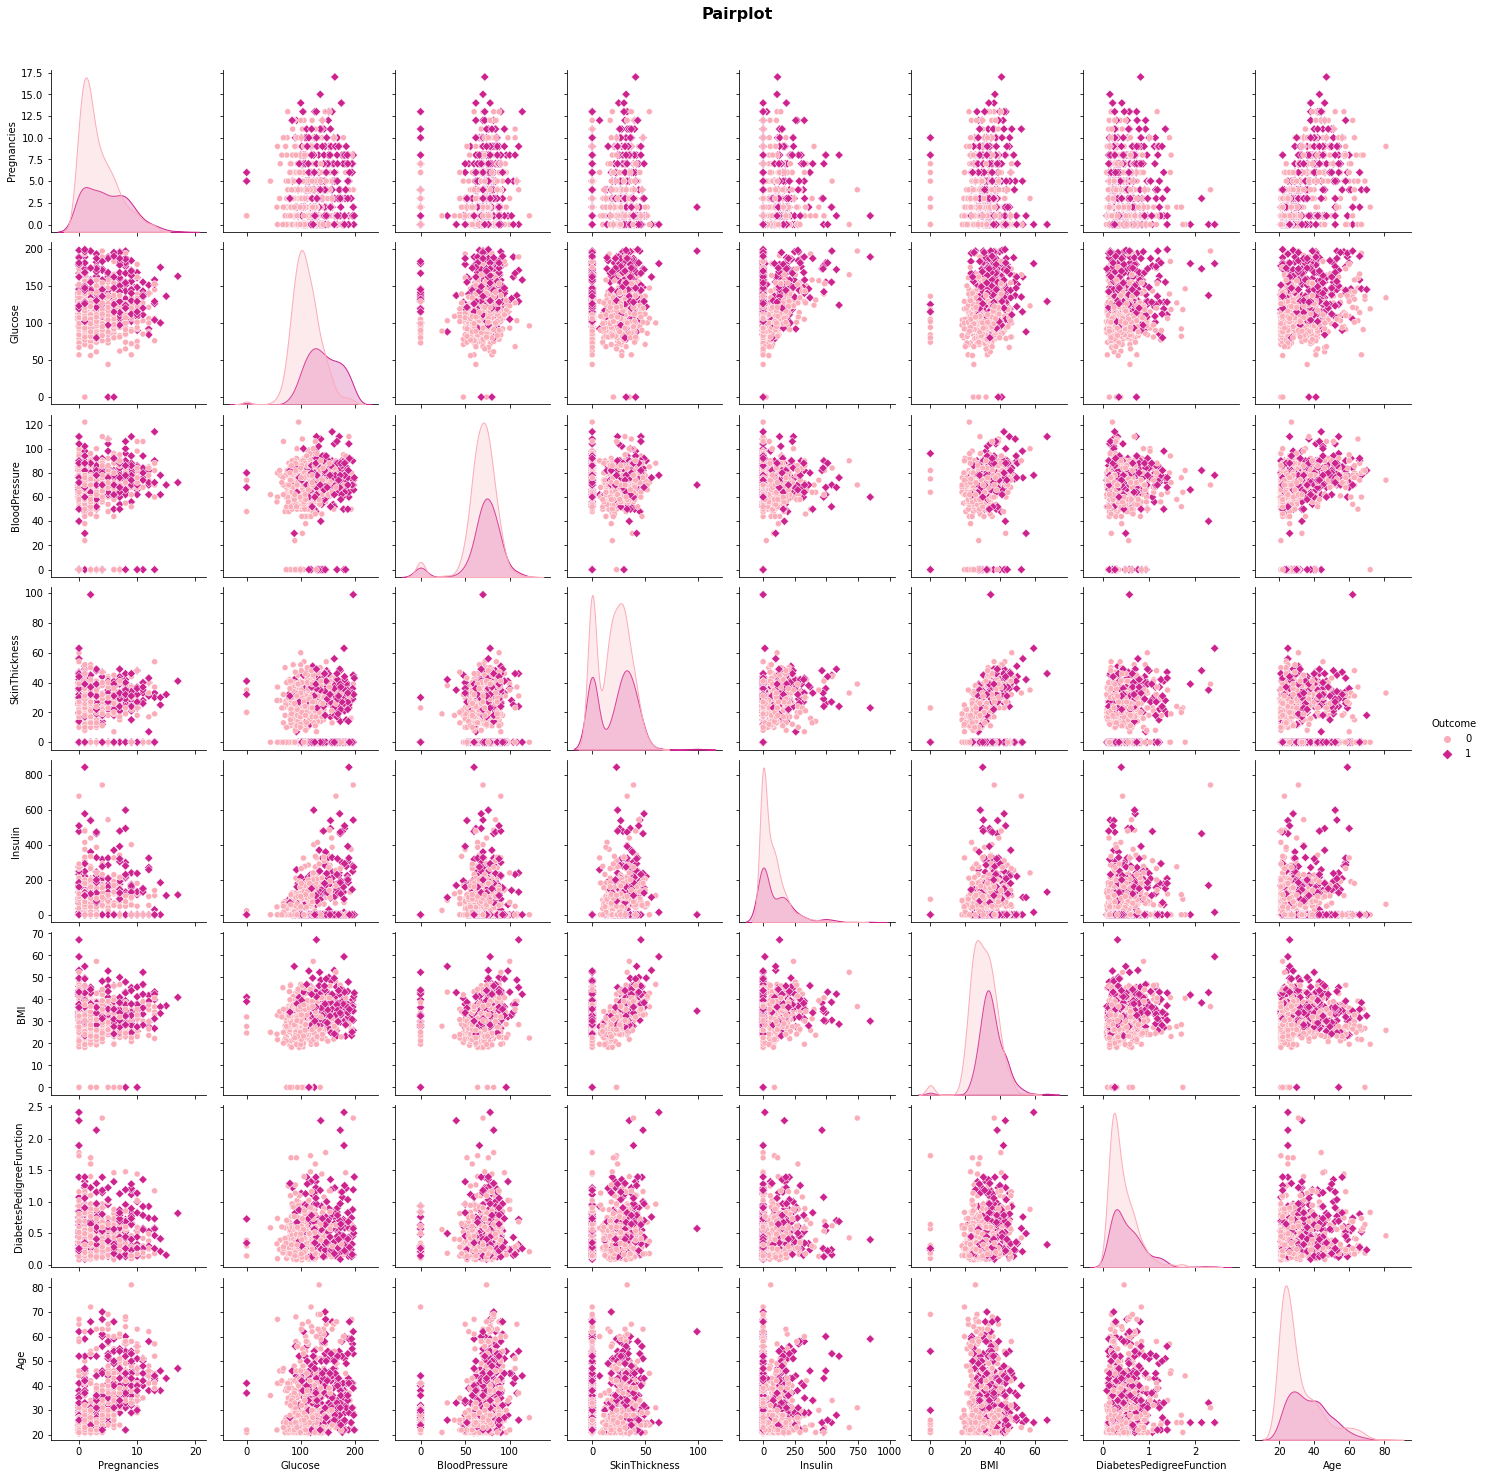

In [10]:
# Se crea el pairplot
pairplot = sns.pairplot(dataset, hue = 'Outcome', palette = 'RdPu', markers = ['o', 'D'], vars = cols_sin_outcome)
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', fontfamily = 'sans-serif')

En todos los scatter plots en los que interviene la variable "Glucose", parece que las muestras pueden ser sencillamente separables en "con diabetes" y "sin diabetes".

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

In [11]:
# Se genera la matriz de correlacion
mat_corr = dataset.corr()

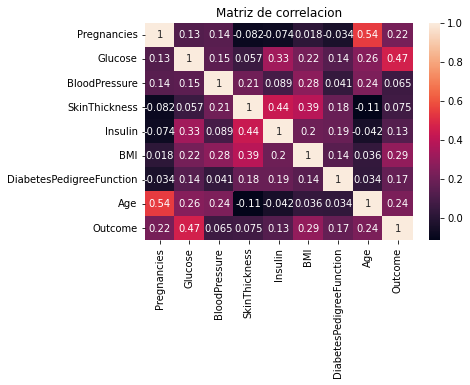

In [12]:
# Se imprime un heatmap
corr_plot = sns.heatmap(mat_corr, annot=True)
plt.title("Matriz de correlacion")
plt.show()

Podemos decir que los dos pares de variables más correlacionadas son, por un lado, "Age" y "Pregnancies" y, por otro, "Glucose" y "Outcome".
Las relaciones entre ambos son directas.

In [13]:
corr_age_preg = round(mat_corr.iat[7,0], 3)
print(f'La correlación entre "Age" y "Pregnancies" es: {corr_age_preg}')

La correlación entre "Age" y "Pregnancies" es: 0.544


In [14]:
corr_glu_out = round(mat_corr.iat[8,1],3)
print(f'La correlación entre "Glucose" y "Outcome" es: {corr_glu_out}')

La correlación entre "Glucose" y "Outcome" es: 0.467


##### **Objetivo 8**
Hacer un histograma de la variable BMI

Text(0.5, 1.0, 'Histograma de la feature "BMI"')

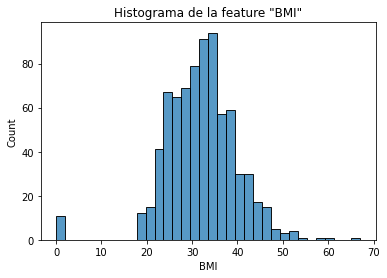

In [15]:
# Se genera e imprime el histograma de BMI
hist = sns.histplot(data=dataset, x='BMI', stat='count')
hist.set_title('Histograma de la feature "BMI"')

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

Si.
El histograma nos permite ver que una de las muestras tiene un IBM igual a 0 lo cual representa un error. No es posible que la variable IBM tome ese valor, por ello lo correcto sería eliminar dicho registro.

Por otra parte, nos permite suponer que los valores superiores a 60 son outliers.

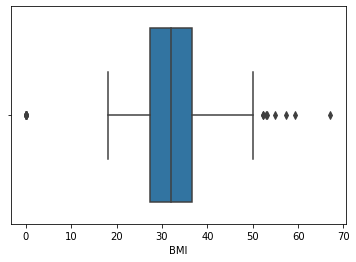

In [16]:
# Se genera el boxplot de la variable BMI
sns.boxplot(x="BMI", data=dataset)

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [17]:
# Se calcula el percentil 90 de la feature BMI
percentil_90_BMI = dataset['BMI'].quantile(0.9)
percentil_90_BMI

41.5

In [18]:
# Se eliminan aquellos registros en los que el BMI supera el percentil 90.
dataset = dataset.loc[dataset['BMI']<percentil_90_BMI]

In [19]:
# Se eliminan aquellos registros en los que el BMI es igual o menor a 0.
dataset = dataset.loc[dataset['BMI']>0]

In [20]:
# Se verifica cuantos registros quedaron en el dataset
np.shape(dataset)

(679, 9)

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

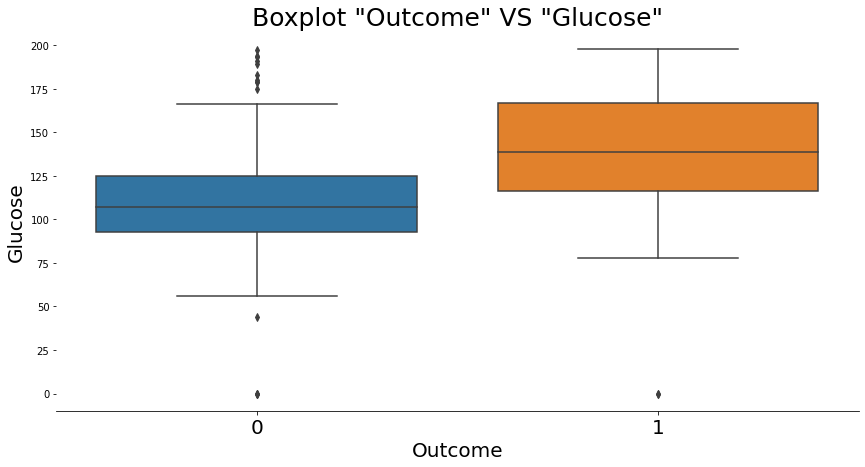

In [21]:
# Se genera el boxplot
hist_1 = sns.catplot(data=dataset,
                x="Outcome",y='Glucose', 
                kind="box", height = 6, aspect=2)
hist_1.despine(left=True)
hist_1.set_xticklabels(size=20)
hist_1.set_ylabels("Glucose",size=20)
hist_1.set_xlabels("Outcome",size=20)
plt.title('Boxplot "Outcome" VS "Glucose"',size = 25)
plt.show()

Podemos observar que los individuos con diabetes ("Outcome" = 1) suelen tener un valor de concentración de glucosa en plasma mayor a quienes no padecen de diabetes.

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

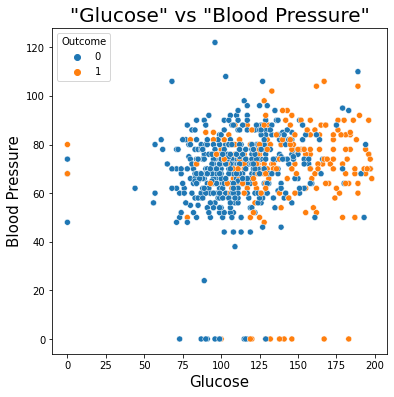

In [22]:
# Se genera el scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=dataset.Glucose,y=dataset.BloodPressure,hue=dataset.Outcome)
plt.xlabel("Glucose",fontsize=15)
plt.ylabel("Blood Pressure",fontsize=15)
plt.title('"Glucose" vs "Blood Pressure"', fontsize=20)

plt.show()

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [23]:
# En función del valor de la variable 'Age' se define el valor de la nueva variable 'RangoEdad' para cada registro.
dataset.loc[(dataset['Age'] > 0) & (dataset['Age'] < 30), 'RangoEdad'] = 'menor a 30 años'
dataset.loc[(dataset['Age'] >= 30) & (dataset['Age'] < 40), 'RangoEdad']   = 'entre 30 y 40 años'
dataset.loc[dataset['Age'] >= 40, 'RangoEdad'] = 'mayor a 40 años'

In [24]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RangoEdad
0,6,148,72,35,0,33.6,0.627,50,1,mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,menor a 30 años
5,5,116,74,0,0,25.6,0.201,30,0,entre 30 y 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

Text(0.5, 1.0, 'Cantidad de pacientes diabéticos y no diabéticos por rango etario')

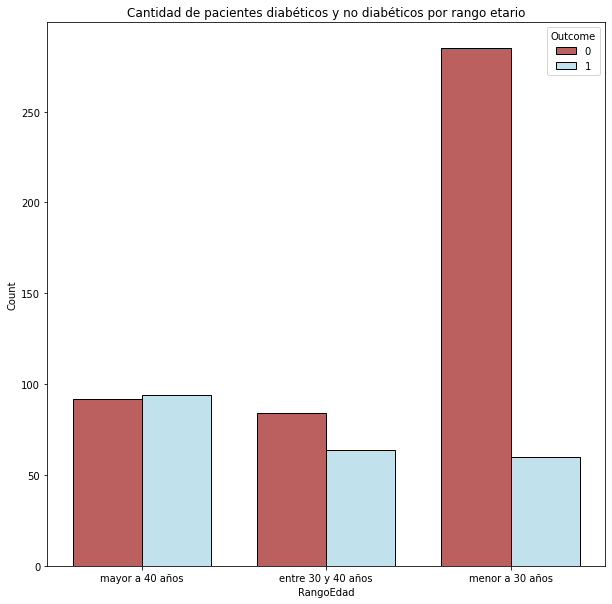

In [25]:
# Se genera y visualiza el count plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=dataset, x='RangoEdad', hue='Outcome', stat='count', multiple="dodge", shrink=0.75, palette=['Brown', 'Lightblue'])
ax.set_title('Cantidad de pacientes diabéticos y no diabéticos por rango etario')